In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots as sbp

In [9]:
df_wsd = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_wasserstein_geo_isp.csv", index_col = 0)
df_geo_features = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_grid_geo_features_isp.csv", index_col = 0).T
weighting= "exp"
df_moran = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_moran_{weighting}_isp.csv", index_col = 0)
df_corr = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_correlation_features_isp.csv", index_col = 0).T

df_zerocell = pd.read_csv(f'/data/housing/data/intermediate/jl_pop_synth/zero_cell_ips.csv', index_col = 0)

df_r2 = pd.read_csv(f'/data/housing/data/intermediate/jl_pop_synth/utility_r2_regression_vs_real_price_isp.csv', index_col = 0)



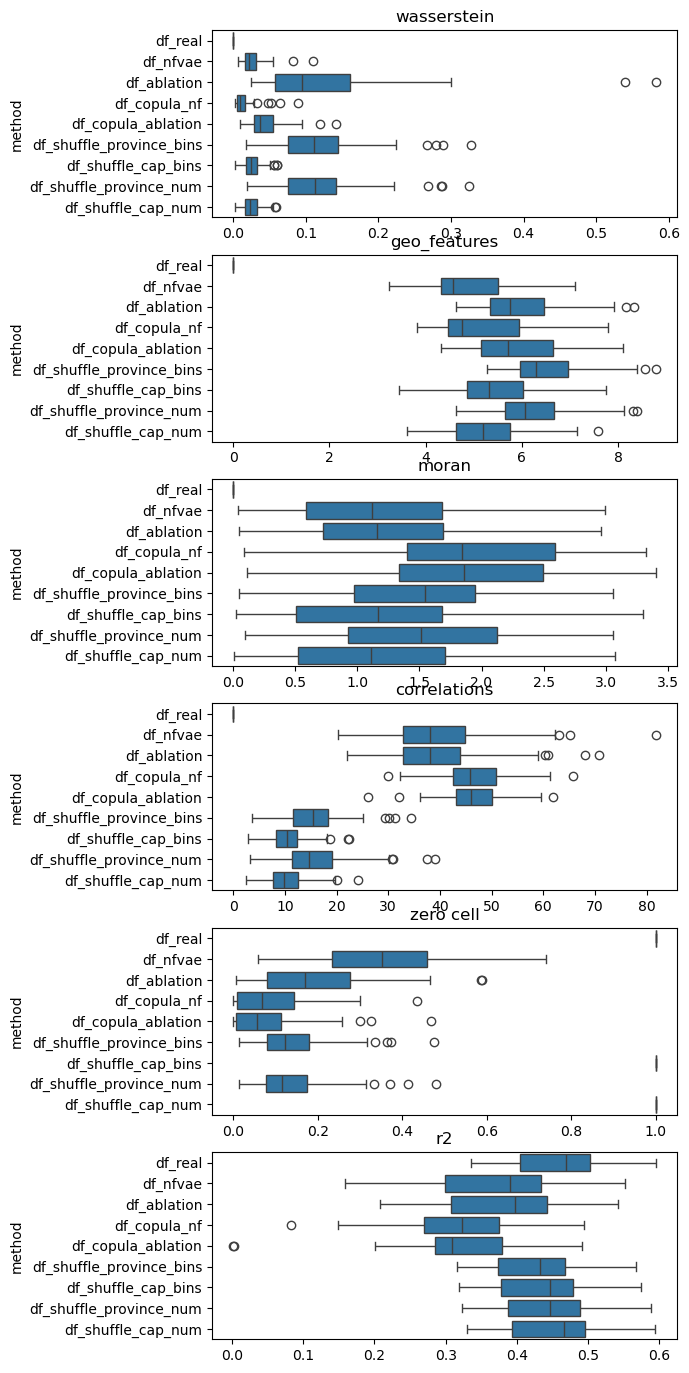

In [10]:
fig, axes = sbp(figsize = (6,17), nrows = 6)

for k, (df_, title) in enumerate(zip([df_wsd,df_geo_features, df_moran,df_corr,df_zerocell,df_r2], ["wasserstein", "geo_features", "moran", "correlations", "zero cell", "r2"])):
    sns.boxplot(data = df_.stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"}),
                x = "metric",
                y = "method",
                ax = axes[k]
                )
    axes[k].set_title(title)
    axes[k].set_xlabel("")

In [16]:
df_wsd = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_wasserstein_geo_airbnb.csv", index_col = 0)
df_corr = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_correlation_features_airbnb.csv", index_col = 0)
df_geo_features = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_grid_geo_features_airbnb.csv", index_col = 0)

df_zerocell = pd.read_csv(f'/data/housing/data/intermediate/jl_pop_synth/zero_cell_airbnb.csv', index_col = 0)

df_r2 = pd.read_csv(f'/data/housing/data/intermediate/jl_pop_synth/utility_r2_regression_vs_real_price_airbnb.csv', index_col = 0)

<Axes: xlabel='metric', ylabel='method'>

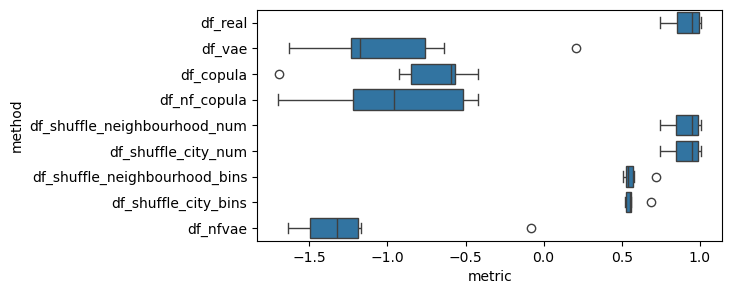

In [31]:
fig, axes = sbp(figsize = (6,3))


sns.boxplot(data = df_r2.apply(lambda x: (x - x.mean()) / x.std(), axis = 1).stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"}),
            x = "metric",
            y = "method"
             )

In [ ]:
df_wsd.stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"})

,prov,method,metric
0,brisbane,df_real,-0.854192
1,brisbane,df_vae,0.203361
2,brisbane,df_copula,-0.230425
3,brisbane,df_nf_copula,-0.487922
4,brisbane,df_shuffle_neighbourhood_num,-0.733150
5,brisbane,df_shuffle_city_num,1.672853
6,brisbane,df_shuffle_neighbourhood_bins,-0.723943
7,brisbane,df_shuffle_city_bins,1.675028
8,brisbane,df_nfvae,-0.521611
9,hawaii,df_real,-1.094380
